## HYPOTHESIS TESTING AND EDA BUSINESS CASE STUDY

# Problem Statement:

### A micro-mobility service provider wants to understand the factors affecting the demand for shared electric cycles in the Indian market.
> - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
> - How well those variables describe the electric cycle demands  
>- Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

Select an appropriate test to check whether:
>- Working Day has effect on number of electric cycles rented
>- No. of cycles rented similar or different in different seasons
>- No. of cycles rented similar or different in different weather
>- Weather is dependent on season (check between 2 predictor variable)

In [1]:
#importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#importing data

df = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/bike_sharing.txt')

In [4]:
df.shape   #contains 10886 rows

(10886, 12)

In [60]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,12.998,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,12.998,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,12.998,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,12.998,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,12.998,0,1,1


### Column Profiling:
>- **datetime**: date and time  
>- **season**: (season 1: spring, 2: summer, 3: fall, 4: winter)  
>-**holiday**: whether day is a holiday or not  
>-**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.  
>-**weather**:.  
>1: Clear, Few clouds, partly cloudy, partly cloudy  
>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    
>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
>-**temp**: temperature in Celsius  
>-**atemp**: feeling temperature in Celsius  
>-**humidity**: humidity  
>-**windspeed**: wind speed  
>-**casual**: count of casual users  
>-**registered**: count of registered users  
>-**count**: count of total rental bikes including both casual and registered  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Preliminary insights on data:
>- No null data present in all the columns
>- **Categorical data** in columns season, holiday, workingday and weather needs to be **converted to 'category' type**
>- **Datetime data** is of object type and needs to converted to datetime type

In [12]:
#confirming absence of null data
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [72]:
#converting categorical columns to 'category' type

cat_columns = ['season', 'holiday', 'workingday' , 'weather']
for x in cat_columns:
    df[x] = df[x].astype('category')


/var/folders/05/my2x9hyn11n12pl1nz2l9wmh0000gn/T/ipykernel_10506/3645554738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].astype('category')


In [74]:
# converting datetime column to datetime type

df['datetime'] = pd.to_datetime(df['datetime'])


/var/folders/05/my2x9hyn11n12pl1nz2l9wmh0000gn/T/ipykernel_10506/3478358402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


In [75]:
#datatypes after conversion

df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [18]:
#checking statistical summary for numerical values
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Insights:
>- mean for **count** is at 191 whereas **median is far from mean** at 145 which hints at **presence of outliers**
>- same is true for casual as well as registered columns
>- **outliers may needed to removed for count column**
>- mean and median are close for temp, atemp, humidity and windspeed which means **lower chances of outliers**
>- **min value in humidity and windspeed is 0** which may mean absence of data for those rows

In [22]:
#number of unique values in categorical variables
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [41]:
#checking for '0' values in humidity and windspeed 
for x in ['humidity','windspeed']:
    print(df[x].loc[df[x]==0].value_counts())
print()
for x in ['humidity','windspeed']:
    p = int(df[x].loc[df[x]==0].value_counts())/len(df)*100
    p = round(p,2)
    print(f'Count of "0" values in {x} column as percentage of total rows: {p}%')

0    22
Name: humidity, dtype: int64
0.0    1313
Name: windspeed, dtype: int64

Count of "0" values in humidity column as percentage of total rows: 0.2%
Count of "0" values in windspeed column as percentage of total rows: 12.06%


>- Number of **'0' values in windspeed** column are significant (12%)
>- They can be **replaced with median** of windspeed for **respective seasons**
>- Similar replacement can be done for humidity data as well

In [43]:
df_copy = df.copy()


In [52]:
# Replacing '0' values in windspeed column with median of windspeed of its corresponding season

for i in range(len(df)):
    if df.windspeed[i]==0:
        s = df['season'][i]
        r = df.loc[df['season']==s]['windspeed'].median()
        df['windspeed'][i]=r


/var/folders/05/my2x9hyn11n12pl1nz2l9wmh0000gn/T/ipykernel_10506/2976864317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['windspeed'][i]=r


In [54]:
# Replacing '0' values in humidity column with median of humidity of its corresponding season
for i in range(len(df)):
    if df.humidity[i]==0:
        s = df['season'][i]
        r = df.loc[df['season']==s]['humidity'].median()
        df['humidity'][i]=r

/var/folders/05/my2x9hyn11n12pl1nz2l9wmh0000gn/T/ipykernel_10506/3101935573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['humidity'][i]=r


In [58]:
# Checking minimum values in humidity and windspeed columns
df[['humidity','windspeed']].min()

humidity     8.0000
windspeed    6.0032
dtype: float64

>- **null or '0' values in humidity and windspeed** columns replaced

<AxesSubplot:ylabel='count'>

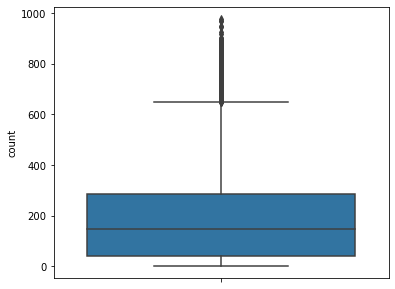

In [64]:
#Checking for outliers in count column

plt.figure(figsize = [6,5])
sns.boxplot(y = 'count', data = df)

>- Presence of outliers can be seen in the boxplot
>- **IQR method can be used to remove outliers** 

In [66]:
# Using IQR to remove outliers

q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1

df = df.loc[(df['count'] >= q1 - 1.5*iqr) & (df['count'] <= q3 + 1.5*iqr)]

In [67]:
#checking shape of data after outlier removal

df.shape

#approximately 300 rows removed

(10586, 12)

## Understanding the Data:

### Univariate Analysis:

In [125]:
#Analysis of datetime column

# Range of dates in the dataset

print('Dates in the given data range from', df['datetime'].min(), 'to', df['datetime'].max())

Dates in the given data range from 2011-01-01 00:00:00 to 2012-12-19 23:00:00


<AxesSubplot:xlabel='Years'>

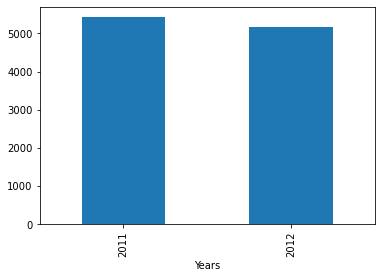

In [139]:
#Analysis of datetime column

#Number of rows for each year 
df['datetime'].dt.year.value_counts()

<AxesSubplot:xlabel='Months'>

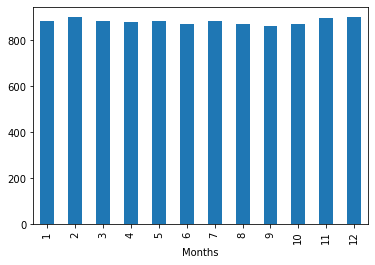

In [138]:
#number of rows for each month of year

df['datetime'].dt.month.value_counts().sort_index().plot(kind = 'bar', xlabel = 'Months')

<AxesSubplot:xlabel='Week of Year'>

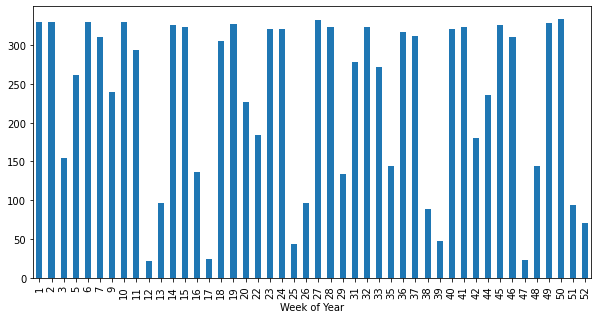

In [143]:
#number of rows for each month of year

df['datetime'].dt.isocalendar().week.value_counts().sort_index().plot(kind = 'bar', rot = 90, figsize = [10,5],xlabel = 'Week of Year' )

### Insights:
>- Data is distributed for both the years as well as all the months almost equally
>- No. of rows per week see a dip occasionally but no specific pattern can be seen.
>- Needs further analysis taking into account count column

<AxesSubplot:xlabel='workingday'>

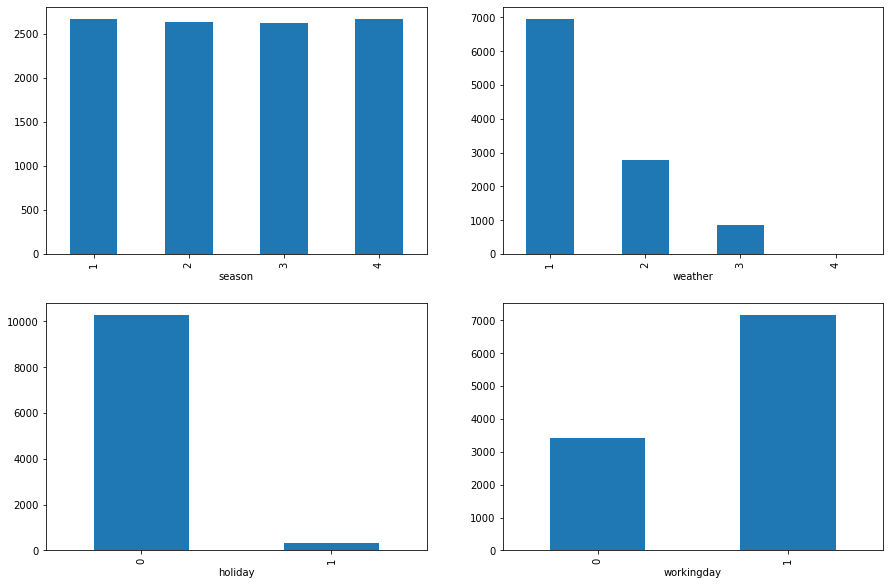

In [144]:
# Analysis of categorical variables Season, Weather, Holiday and Workingday

plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
df['season'].value_counts().sort_index().plot(kind= 'bar', xlabel = 'season')

plt.subplot(2,2,2)
df['weather'].value_counts().sort_index().plot(kind= 'bar', xlabel = 'weather')

plt.subplot(2,2,3)
df['holiday'].value_counts().sort_index().plot(kind= 'bar', xlabel = 'holiday')

plt.subplot(2,2,4)
df['workingday'].value_counts().sort_index().plot(kind= 'bar', xlabel = 'workingday')

### Insights:

Season:
>- All four seasons have roughly similar number of rows  

Weather:
>- Category 4 has almost no data entries and can be ignored for our analysis
>- Category 1 has disproportionately more data compared to category 2 and 3

Holiday:
>- Category 1, i.e. holidays have very low data points compared to category 0 i.e. non-holidays which can mean very few rides taken on holidays

Workingday:
>- Category 1, i.e. working days have almost double the rides compared to non-working days

<AxesSubplot:xlabel='Count', ylabel='atemp'>

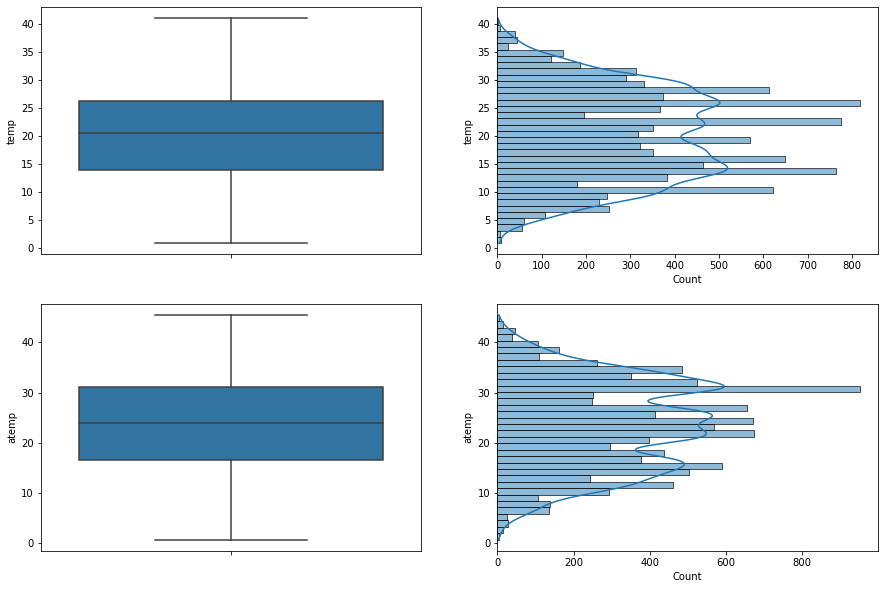

In [159]:
# Analysis of numerical variables temp and atemp

plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
sns.boxplot(y = 'temp', data = df)

plt.subplot(2,2,2)
sns.histplot(y = 'temp', data = df, kde= True)


plt.subplot(2,2,3)
sns.boxplot(y = 'atemp', data = df)


plt.subplot(2,2,4)
sns.histplot(y = 'atemp', data = df, kde= True)


### Insights:
>- temp: presence of outliers is not seen and median value observed around 20
>- atemp: presence of outliers is not seen and median value observed 25

<AxesSubplot:xlabel='Count', ylabel='humidity'>

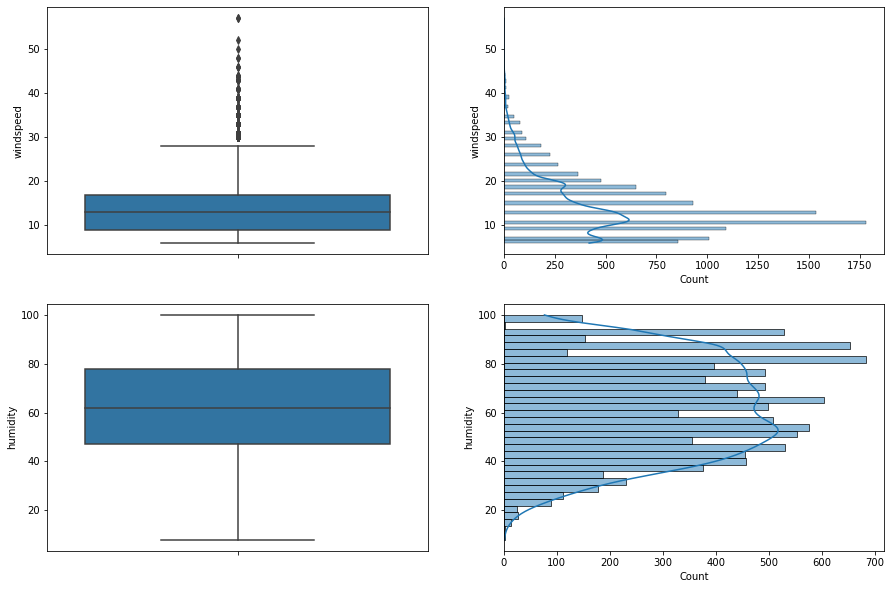

In [160]:
#Analysis of numerical variables humidity and windspeed

plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
sns.boxplot(y = 'windspeed', data = df)

plt.subplot(2,2,2)
sns.histplot(y = 'windspeed', data = df, kde= True)


plt.subplot(2,2,3)
sns.boxplot(y = 'humidity', data = df)

plt.subplot(2,2,4)
sns.histplot(y = 'humidity', data = df, kde = True)

### Insights:
Windspeed: 
>- Presence of outliers observed in box plot in the higher end above 30 and median value of 13 observed
>- Majority of data concentrated in the lower range of values below 20

Humidity: 
>- No presence of outliers seen in box plot.
>- Median value observed just above 60

<AxesSubplot:xlabel='count', ylabel='Percent'>

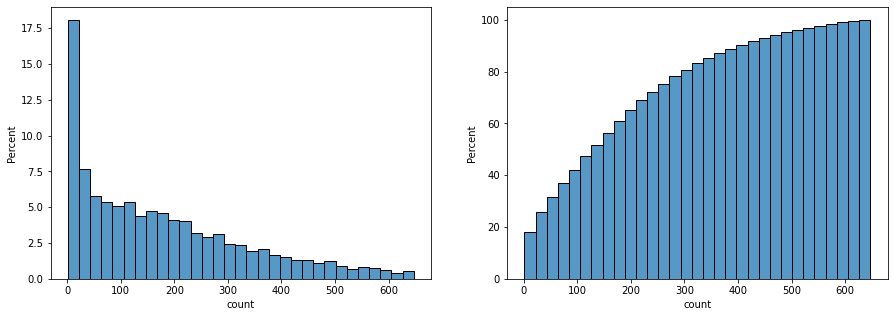

In [170]:
# Checking the distribution of value in count column
# Plotting regular histogram along with histogram showing cumulative values

plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sns.histplot(df['count'], stat = 'percent')

plt.subplot(1,2,2)
sns.histplot(df['count'], stat = 'percent', cumulative= True)

### Insights:
>- Most values, i.e. almost 20% are 0 in the count column which means no rentals
>- 60% of the values lie below 200 approximately 80% below 350 which includes 20% of 0 values
>- **As column count includes both casual as well as registered users, we will be analysing data with count column alone henceforth**

## Bivariate Analysis:
### All the attributes will be analyzed with the count column to gain preliminary insights on their relationship

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.0,78.0,161.0,644.0
2,2634.0,195.824981,166.371838,1.0,45.0,165.0,299.0,647.0
3,2617.0,210.651127,164.245975,1.0,60.0,185.0,324.0,647.0
4,2665.0,184.578236,154.793646,1.0,49.0,154.0,277.0,647.0


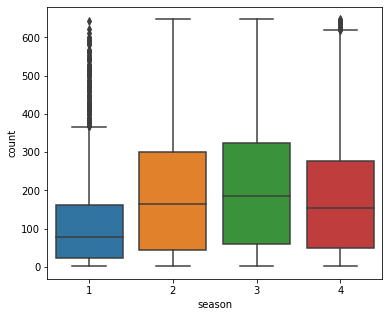

In [192]:
# Analysis of season with count

plt.figure(figsize= [6,5])
sns.boxplot(x = 'season', y = 'count', data = df)
df.groupby('season')['count'].describe()

### Insights:
>- Median values for season 2 and 3 are in highest range (165-185) followed by season 4 at 154
>- Median and mean values for season 1 is very low comparatively at 78
>- Many outliers can be seen rental bikes count for season 1
>- Season may have some impact on bike rental count based on preliminary visual analysis
>- Relationship between season and number of rentals needs to be further investigated with hypothesis testing

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


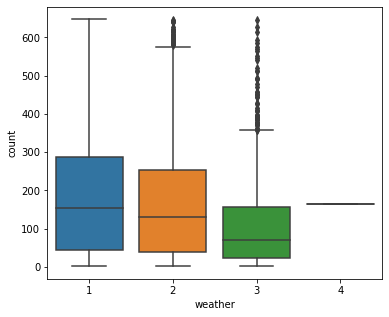

In [191]:
# relationship between weather and count

plt.figure(figsize= [6,5])
sns.boxplot(x = 'weather', y = 'count', data = df)
df.groupby('weather')['count'].describe()

### Insights:
>- Weather 4 (winter) has only one row and that data can be ignored for our analysis
>- Weather 1 shows highest bike rentals followed by 2 and 3 in decreasing order. 
>- Median value for rental count in weather 3 is substantially lower than those in weather 1 and 2
>- Weather 3 also has many outlier values in rental count
>- There seems to be some impact of weather on bike rental and needs to be investigated further

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10277.0,175.510460,156.135539,1.0,40.0,139.0,269.0,647.0
1,309.0,182.588997,163.766590,1.0,38.0,127.0,304.0,597.0


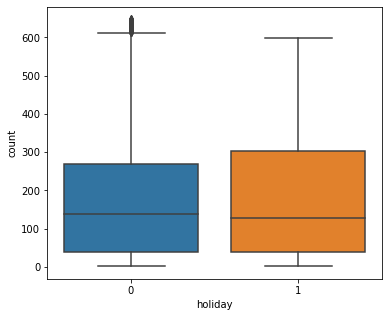

In [190]:
# relationship between holiday and count

plt.figure(figsize= [6,5])
sns.boxplot(x = 'holiday', y = 'count', data = df)
df.groupby('holiday')['count'].describe()

### Insights:
>- Only 309 rows present for holidays compared to 1027 rows for non-holidays showing clear preference for rentals on non-holidays
>- Comparison between holiday and non-holidays data may lead to biased results due to difference in sizes

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3425.0,181.373723,164.290054,1.0,43.0,125.0,296.0,647.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.0,646.0


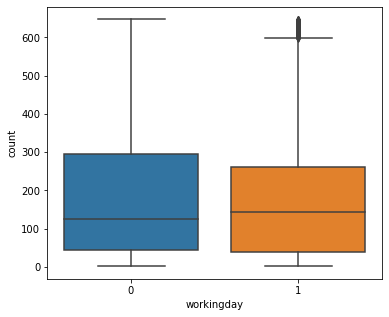

In [197]:
# relationship between workingday and count

plt.figure(figsize= [6,5])
sns.boxplot(x = 'workingday', y = 'count', data = df)
df.groupby('workingday')['count'].describe()

### Insights:
>- median value for working day (1) is higher at 143 than 125 for non-working day
>- presence of outliers can be seen in rental counts on working day
>- All the quartile values seem to be in close range for working as well as non-working day and there seems to be no impact on bike rentals
>- This lack of impact on rental needs to be further tested statistically

<AxesSubplot:xlabel='atemp', ylabel='count'>

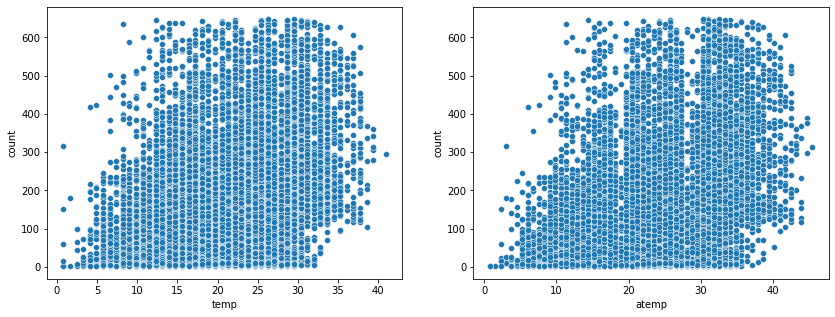

In [210]:
# Analysing temp and atemp with count

plt.figure(figsize= [14,5])

plt.subplot(1,2,1)
sns.scatterplot(x = 'temp', y= 'count', data = df)

plt.subplot(1,2,2)
sns.scatterplot(x = 'atemp', y= 'count', data = df)

### Insights:
>- Both the variables temperature as well as feeling temp (atemp) seem to show no correlation with count of bike rentals
>- Points in scatterplot are distributed all over the range and show no convergence

<AxesSubplot:xlabel='windspeed', ylabel='count'>

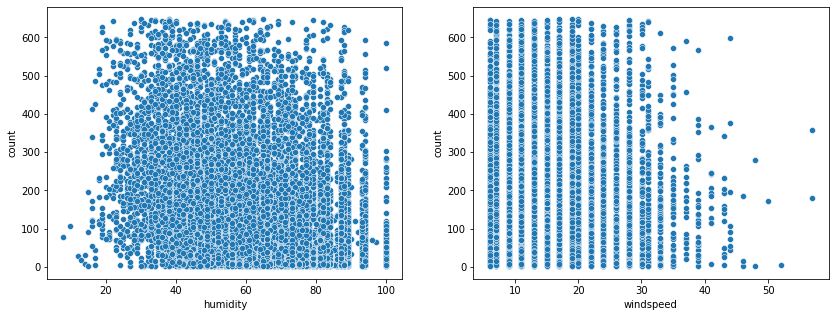

In [220]:
# Analysing windspeed and humidity with count

plt.figure(figsize= [14,5])

plt.subplot(1,2,1)
sns.scatterplot(x = 'humidity', y= 'count', data = df)

plt.subplot(1,2,2)
sns.scatterplot(x = 'windspeed', y= 'count', data = df)

### Insights:
>- As visible from scatterplots, both windspeed and humidity are not showing any correlation with rental count
>-Points in scatterplot are distributed all over the range and show no convergence

## End of preliminary analysis of data

>- All the columns were analysed individually as well as bivariate analysis for all the attributes with count was done to establish some relation with target statistic cycle rental counts.  
>- Insights on each analysis mentioned above

________

## Hypothesis Testing:

### 1. Test for effect of Working day on cycle rentals

>To test effect of workingday on rental counts, we will be conducting an **independent T-test**. As we do not know population variance, we cannot conduct Z test
> We are choosing independent T test as workingday and rental count are independent variables

> Assumptions for T-test:
>1. The two samples data groups are independent
>2. The data elements in respective groups follow any **normal distribution** --> To be checked with **Shapiro Wilk test**
>3. Homogeneity assumption: The given two samples have **similar variances**--> To be checked with **Levene test**


In [222]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3425.0,181.373723,164.290054,1.0,43.0,125.0,296.0,647.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.0,646.0


> Non-working day (0) has the lower number rows in the data, i.e. 3425  
> **Sample size of 3425** can be used for hypothesis testing to reduce error in results

In [240]:
# Generating samples from given data

wday_1 = df.loc[df['workingday']==1]['count'].sample(3425)
wday_0 = df.loc[df['workingday']==0]['count'].sample(3425)

Text(0.5, 0, 'Rental Count for Non-Working Days')

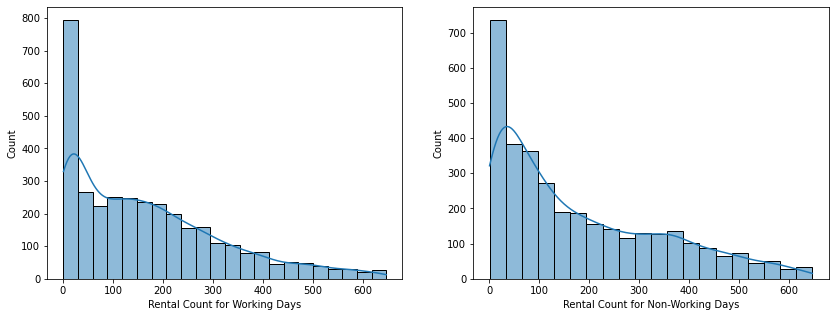

In [229]:
#checking normality of two data samples with histogram

plt.figure(figsize= [14,5])

plt.subplot(1,2,1)
sns.histplot(wday_1, kde= True)
plt.xlabel('Rental Count for Working Days')

plt.subplot(1,2,2)
sns.histplot(wday_0, kde= True)
plt.xlabel('Rental Count for Non-Working Days')

>- Visual analysis shows that both distributions for working and non-working days are not normal

In [233]:
# Checking for normality of distribution with Shapiro-Wilk test

from scipy.stats import shapiro
test_1, pval_1= shapiro(wday_1)
test_0, pval_0= shapiro(wday_0)
print('p-value for Shapiro-Wilk test for working days sample:' ,pval_1)
print('p-value for Shapiro-Wilk test for non-working days sample:' ,pval_0)


p-value for Shapiro-Wilk test for working days sample: 3.735861705889962e-42
p-value for Shapiro-Wilk test for non-working days sample: 2.382207389352189e-44


>- p-value for both working days and non-working days data **fails Shapiro-Wilk test as p-value is less than 0.05**  
>- Therefore **both working and non-working days data are not distributed normally**


In [226]:
# Checking for similarity of variance of distribution with Levene test

from scipy.stats import levene
test, pval= levene(wday_1, wday_0)

print('p-value for Levene test:', pval) 


p-value for Levene test: 3.4442630898260626e-06


>- p-value for both working days and non-working days data **fails Levene test as p-value is less than 0.05**  
>- This shows that working and non-working days **data do not have similar variances**  

**Thus 2 out of three assumptions for 2 sample T-tests have failed**  


> We will still be conducting the 2 sample independent T test to check the result obtained from analysis  
> The Welch’s t-test will be conducted by **not considering variances to be equal**.


#### Null hypothesis Ho: 
> Working days and non-working days do not impact rental count, i.e. mean of cycles rented for both working and non-working days are same
#### Alternate Hypothesis Ha:
> Working days see more cycle rentals compared to non-working days, i.e. mean of cycles on working day greater than non-working days  

**Type of test:** We will be conducting a **right tailed test** to test the null hypothesis as alternate hypothesis is that mean of working days is greater than non-working days   
**Significance level:** A significance level of 5% will be considered

In [248]:
# conducting independent t test using scipy.stats library function


from scipy.stats import ttest_ind 
test_stats, p_val = ttest_ind (wday_1, wday_0, equal_var=False, alternative= 'greater')
print('p value for right tailed T test is:', p_val)

p value for right tailed T test is: 0.9944642329666955


>- **p value for the T test is greater than 0.05**
>- **It means we fail to reject the null hypothesis which says means for both working and non-working days are same.**


### Conclusion: Working day has no effect on number of bike rentals

### Inference:
>- Organization can ignore the impact of working days on revenue as it has no impact on cycle rentals
>- The conclusion goes against the common intuition that non-working days will see lesser rentals
>- They can utilise this inference to further analyse regions plus pickup and drop points on working and non-working days separately to put more cycle on corresponding busy bike aggregation zones

________

### 2. Test for effect of seasons on number of cycles rented

> To test the effect of seasons on number of cycles rented we will be **using ANOVA or F-test** as this analysis involves more than 2 series of data with 4 seasons present  
> We will use one way ANOVA to find out whether there exists a statistically significant difference between the mean values of samples of 4 seasons' count data

> Assumptions for T-test:
>1. The samples data groups are independent
>2. The data elements in respective groups follow any **normal distribution** --> To be checked with **Shapiro Wilk test**
>3. The given samples have **similar variances**--> To be checked with **Levene test**

In [249]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.0,78.0,161.0,644.0
2,2634.0,195.824981,166.371838,1.0,45.0,165.0,299.0,647.0
3,2617.0,210.651127,164.245975,1.0,60.0,185.0,324.0,647.0
4,2665.0,184.578236,154.793646,1.0,49.0,154.0,277.0,647.0


> Season 3 has the lowest number rows in the data, i.e. 2617  
> **Sample size of 2617** can be used for hypothesis testing to reduce error in results

In [260]:
# Generating samples from given data

s1 = df.loc[df['season']==1]['count'].sample(2617)
s2 = df.loc[df['season']==2]['count'].sample(2617)
s3 = df.loc[df['season']==3]['count'].sample(2617)
s4 = df.loc[df['season']==4]['count'].sample(2617)

Text(0.5, 0, 'Rental Count for Season 4')

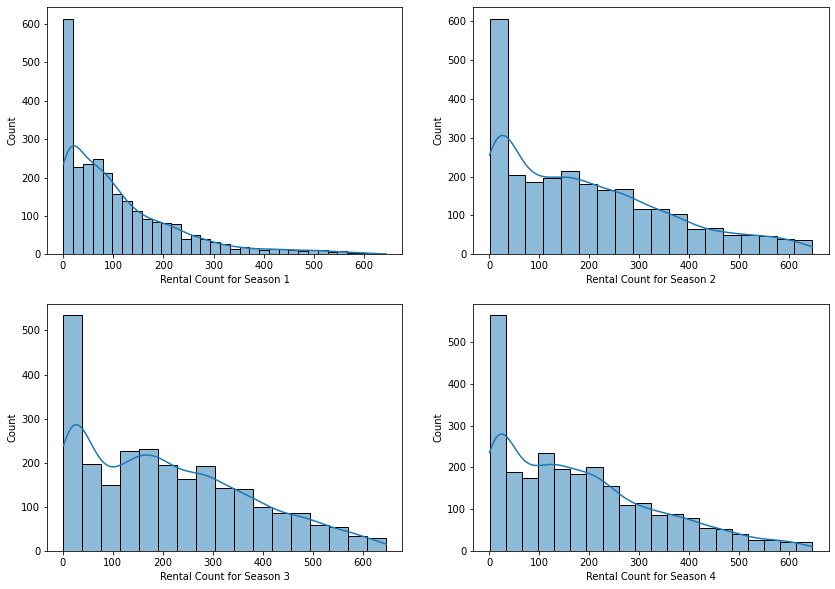

In [252]:
#checking normality of four data samples with histogram

plt.figure(figsize= [14,10])

plt.subplot(2,2,1)
sns.histplot(s1, kde= True)
plt.xlabel('Rental Count for Season 1')

plt.subplot(2,2,2)
sns.histplot(s2, kde= True)
plt.xlabel('Rental Count for Season 2')

plt.subplot(2,2,3)
sns.histplot(s3, kde= True)
plt.xlabel('Rental Count for Season 3')

plt.subplot(2,2,4)
sns.histplot(s4, kde= True)
plt.xlabel('Rental Count for Season 4')

>- Visual Analysis from histograms shows that sample data for counts in all 4 seasons is **not normally distributed**

In [261]:
# Checking for normality of distribution with Shapiro-Wilk test

from scipy.stats import shapiro
test_1, pval_1= shapiro(s1)
test_2, pval_2= shapiro(s2)
test_3, pval_3= shapiro(s3)
test_4, pval_4= shapiro(s4)
print('p-value for Shapiro-Wilk test for season 1 sample:' ,pval_1)
print('p-value for Shapiro-Wilk test for season 2 sample:' ,pval_2)
print('p-value for Shapiro-Wilk test for season 3 sample:' ,pval_3)
print('p-value for Shapiro-Wilk test for season 4 sample:' ,pval_4)


p-value for Shapiro-Wilk test for season 1 sample: 0.0
p-value for Shapiro-Wilk test for season 2 sample: 5.6528058985358975e-36
p-value for Shapiro-Wilk test for season 3 sample: 6.364172259631547e-32
p-value for Shapiro-Wilk test for season 4 sample: 1.8654961899094348e-35


>- **p value for rental count data for all the four seasons is below 0.05**
>- Thus, sample data for all the 4 seasons is not normally distributed

In [262]:
# Checking for similarity of variance of distribution with Levene test

from scipy.stats import levene
test, pval= levene(s1,s2,s3,s4)

print('p-value for Levene test:', pval) 


p-value for Levene test: 5.1693409134763094e-110


>- p-value for count data for all the 4 seasons **fails Levene test as p-value is less than 0.05**  
>- This shows that data for all 4 seasons **do not have similar variances**  

**Thus 2 out of three assumptions for ANOVA test have failed**  


> We will still be conducting the ANOVA test to check the result obtained from analysis as ANOVA tolerates violations to its normality assumption rather well.   
> We could run a Kruskal-Wallis H Test for violation of homogeneity of variances condition but for the time being we will conduct ANOVA to establish relation between seasons and cycle rental count


#### Null hypothesis Ho: 
> Seasons do not impact rental count, i.e. mean of cycles rented for all the seasons are same
#### Alternate Hypothesis Ha:
> Seasons have an impact on rental count, i.e. mean of cycles rented for all the seasons are not same 
  
**Significance level:** A significance level of 5% will be considered

In [264]:
#conducting one way ANOVA test on sample data for 4 seasons

from scipy.stats import f_oneway
test, p_val= f_oneway(s1,s2,s3,s4)
print('p value for ANOVA test is:', p_val)

p value for ANOVA test is: 1.703692179872816e-133


>- **p value for the ANOVA test is less than significance level of 0.05**
>- **It means we can reject the null hypothesis which says means for count of rental of all seasons are same.**


### Conclusion: Seasons do have an effect on number of bike rentals

### Inference:
>- Bike rentals change with seasons as would be the common intuition
>- From earlier analysis, we saw that season 1 (spring) showed lower bike rentals compared to others
>- Greater focus can be given in seasons where rentals are high and more resources (physical as well as human resources) can be diverted to bike aggregation zones in seasons 3 and 4 particularly.
>- Heavier discounts may be provided in seasons with lower rentals to make up for loss of revenue with higher count of rentals

________

### 3. Test for effect of weather on number of cycles rented

> To test the effect of weather on number of cycles rented we will be **using ANOVA or F-test** as this analysis involves more than 2 series of data with 4 weathers present  
> We will use one way ANOVA to find out whether there exists a statistically significant difference between the mean values of samples of 4 weathers' count data

> Assumptions for T-test:
>1. The samples data groups are independent
>2. The data elements in respective groups follow any **normal distribution** --> To be checked with **Shapiro Wilk test**
>3. The given samples have **similar variances**--> To be checked with **Levene test**

In [265]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


>- As weather 4 has only 1 row we will be ignoring that row and conducting analysis for the remaining 3 weathers
>- The median and standard deviation values seem far from each other in preliminary analysis
>- We will be considering samples of size 850 as that is the lowest count for among the 3 data series 

In [266]:
# Generating samples from given data

w1 = df.loc[df['weather']==1]['count'].sample(850)
w2 = df.loc[df['weather']==2]['count'].sample(850)
w3 = df.loc[df['weather']==3]['count'].sample(850)


Text(0.5, 0, 'Rental Count for Weather 3')

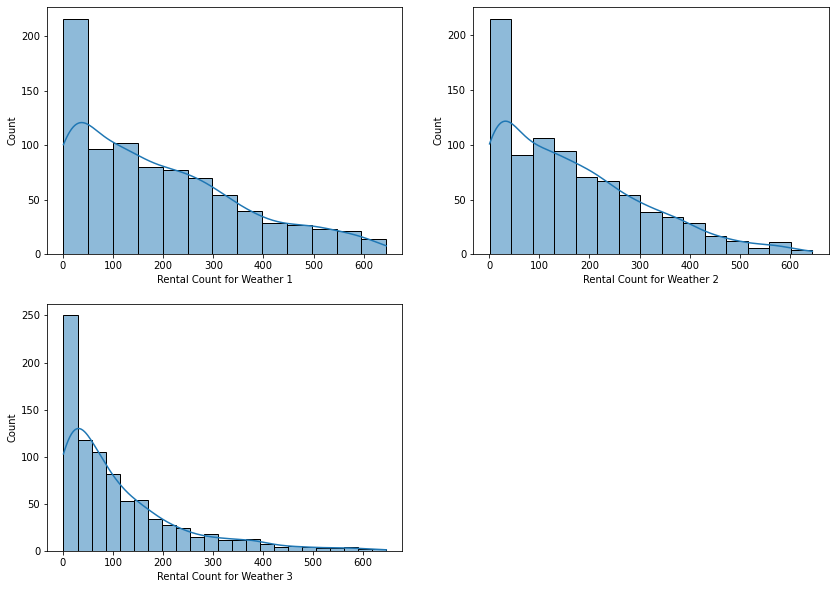

In [267]:
#checking normality of three data samples with histogram

plt.figure(figsize= [14,10])

plt.subplot(2,2,1)
sns.histplot(w1, kde= True)
plt.xlabel('Rental Count for Weather 1')

plt.subplot(2,2,2)
sns.histplot(w2, kde= True)
plt.xlabel('Rental Count for Weather 2')

plt.subplot(2,2,3)
sns.histplot(w3, kde= True)
plt.xlabel('Rental Count for Weather 3')


>- Visual Analysis from histograms shows that sample data for counts in all 3 weathers is **not normally distributed**

In [268]:
# Checking for normality of distribution with Shapiro-Wilk test

from scipy.stats import shapiro
test_1, pval_1= shapiro(w1)
test_2, pval_2= shapiro(w2)
test_3, pval_3= shapiro(w3)

print('p-value for Shapiro-Wilk test for weather 1 sample:' ,pval_1)
print('p-value for Shapiro-Wilk test for weather 2 sample:' ,pval_2)
print('p-value for Shapiro-Wilk test for weather 3 sample:' ,pval_3)

p-value for Shapiro-Wilk test for weather 1 sample: 1.5587466385802588e-21
p-value for Shapiro-Wilk test for weather 2 sample: 8.980879240660084e-22
p-value for Shapiro-Wilk test for weather 3 sample: 2.4639206068376777e-30


>- **p value for rental count data for all the three weathers is below 0.05**
>- Thus, sample data for all the3 weathers is not normally distributed

In [261]:
# Checking for normality of distribution with Shapiro-Wilk test

from scipy.stats import shapiro
test_1, pval_1= shapiro(w1)
test_2, pval_2= shapiro(w2)
test_3, pval_3= shapiro(w3)

print('p-value for Shapiro-Wilk test for weather 1 sample:' ,pval_1)
print('p-value for Shapiro-Wilk test for weather 2 sample:' ,pval_2)
print('p-value for Shapiro-Wilk test for weather 3 sample:' ,pval_3)

p-value for Shapiro-Wilk test for season 1 sample: 0.0
p-value for Shapiro-Wilk test for season 2 sample: 5.6528058985358975e-36
p-value for Shapiro-Wilk test for season 3 sample: 6.364172259631547e-32
p-value for Shapiro-Wilk test for season 4 sample: 1.8654961899094348e-35


>- **p value for rental count data for all the four seasons is below 0.05**
>- Thus, sample data for all the 4 seasons is not normally distributed

In [269]:
# Checking for similarity of variance of distribution with Levene test

from scipy.stats import levene
test, pval= levene(w1,w2,w3)

print('p-value for Levene test:', pval) 


p-value for Levene test: 1.1952188766274655e-23


>- p-value for count data for all the 3 weathers **fails Levene test as p-value is less than 0.05**  
>- This shows that data for all 3 weathers **do not have similar variances**  

**Thus 2 out of three assumptions for ANOVA test have failed**  


> We will still be conducting the ANOVA test to check the result obtained from analysis as ANOVA tolerates violations to its normality assumption rather well.   
> We could run a Kruskal-Wallis H Test for violation of homogeneity of variances condition but for the time being we will conduct ANOVA to establish relation between weather and cycle rental count


#### Null hypothesis Ho: 
> Weather does not impact rental count, i.e. mean of cycles rented for all the weathers are same
#### Alternate Hypothesis Ha:
> Weather has an impact on rental count, i.e. mean of cycles rented for all the weathers are not same 
  
**Significance level:** A significance level of 5% will be considered

In [270]:
#conducting one way ANOVA test on sample data for 3 weather

from scipy.stats import f_oneway
test, p_val= f_oneway(w1,w2,w3)
print('p value for ANOVA test is:', p_val)

p value for ANOVA test is: 1.9356209927856665e-30


>- **p value for the ANOVA test is less than significance level of 0.05**
>- **It means we can reject the null hypothesis which says means for count of rental of all weather are same.**


### Conclusion: Weather does have an effect on number of bike rentals

### Inference:
>- Bike rentals change with weather as would be the common intuition
>- From earlier analysis, we saw that weather 1 had highest bike rentals as it had clear skies followed by weather 2 which has few clouds followed by weather 3 with lowest rentals which had light rains 
>- Greater focus can be given in weather where rentals are high and more resources (physical as well as human resources) can be diverted to bike aggregation zones in weather 1 and 2 particularly.
>- Heavier discounts may be provided in weather 3 with lower rentals to make up for loss of revenue with higher count of rentals

________

### 4. Test if weather is dependent on season

In [304]:
# creating contigency table
df_ws = pd.crosstab(df['weather'], df['season'])

In [305]:
df_ws

season,1,2,3,4
weather,,,,
1,1744,1721,1843,1657
2,714,690,579,787
3,211,223,195,221
4,1,0,0,0


> To test for dependence of weather on season, we will be using Chi-Square test which is used for checking dependence of categorical variables

> Assumptions for T-test:
>1. Both variables are categorical
>2. All observations are independent
>3. Cells in the contingency table are mutually exclusive

**We can see that all the assumptions for the test are met**

> Now we will be conducting the Chi Square test to check for dependence of weather on season   



#### Null hypothesis Ho: 
> Weather and season are independent variables and share no relation
#### Alternate Hypothesis Ha:
> Weather and season are dependent on each other and share significant relation
  
**Significance level:** A significance level of 5% will be considered

In [309]:
# creating 2d list from contigency table to use as input in chi square function
# ignoring data from weather 4 in the test


data = []
for i in range(0,3):
    data.append(list(df_ws.reset_index().loc[i,1:4]))
data

[[1744, 1721, 1843, 1657], [714, 690, 579, 787], [211, 223, 195, 221]]

In [310]:
#conducting the chi square test

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data)
  
print('p value for Chi Square test is:', p)

p value for Chi Square test is: 6.734426550686341e-08


>- **p value for the Chi Square test is less than significance level of 0.05**
>- **It means we can reject the null hypothesis which says Weather and season are independent variables .**


### Conclusion: Weather and season are dependent on each other and share significant relation

### Inference:
>- As expected weather and season are share a significant relation and impact each other
>- Thus both these variable need not be analysed for checking bike rentals and analysis of one of these would be enough to get results

_____________

## End of Analysis

## Consolidated Insights and Recommendations:

#### Working day has no effect on number of bike rentals

> **Inference:**
>- Business can ignore the impact of working days on revenue as it has no impact on cycle rentals
>- The conclusion goes against the common intuition that non-working days will see lesser rentals
>- Business should not reduce number of cycles on non-working days
>- Business can utilise this inference to further analyse regions plus pickup and drop points on working and non-working days separately to put more cycle on corresponding busy bike aggregation zones
>- Business can use this information to promote its product for both work as well as personal needs?

**Seasons and weather have an effect on number of bike rentals**

> **Inference:**
>- Bike rentals change with seasons as would be the common intuition
>- From earlier analysis, we saw that **season 1 (spring) showed lower bike rentals** compared to others
>- From earlier analysis, we saw that **weather 1 had highest bike rentals** as it had clear skies followed by weather 2 which has few clouds followed by weather 3 with lowest rentals which had light rains
>- Greater focus can be given in seasons or weather where rentals are high and more resources (physical as well as human resources) can be diverted to bike aggregation zones in seasons 3 and 4 or weather 1 and 2 particularly.
>- **Heavier discounts** may be provided in seasons or weather with lower rentals to make up for loss of revenue with higher count of rentals
>- The revenue stream will be dependent on seasons or weather and lower revenues can be expected and planning can be done accordingly for expenses
>- **Extra facilities like raincoats or windsheeters** can be provided in rainy weather to compensate for dip in demand

#### Weather and season are dependent on each other and share significant relation

>**Inference**:
>- As expected weather and season are share a significant relation and impact each other
>- Thus both these variable need not be analysed for checking bike rentals and analysis of one of these would be enough to get results
>- Both these predictor variables have shown significant impact on bike rentals too as would be expected